# Object Detection

**Image Classification vs Object Detection**

Image classification helps to classify what is contained in an image without the need to know its location in it. Whereas object detection provides in addition to the class of the object its location in the image (i.e. the bounding box coordinate surrounding the object).

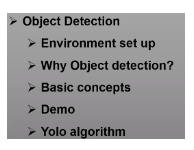

Regular tensorflow environment will not be sufficient for object detection, it requires a special environment.

A mix of concepts and code/hands-on.

In object detection to understand it very well, we will start with the inference part first & then we move to how training is done, how data labelling is done etc.

Normally in Image Classification learning we started with data and training and did the inference part later.

.yml file tells what r dependencies, what files need to be installed.

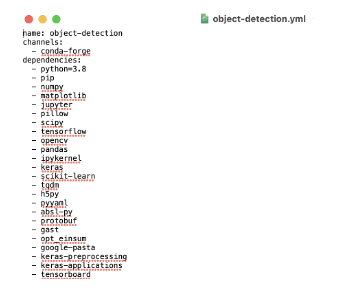

Even if there are multiple objects in image, if model is trained for image classification, it will just give the class with highest probability one as shown below (it gives o/p only banana) cz it can output 1 image only, in 1 class.

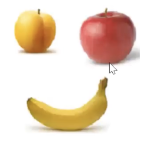

The underlying principles r still same as Image classification & this is foundation on which object detection works.

### Why object detection?

Image classification is fine but in real life you actually dont have just an image but u have a scene where there r multiple things in the scene. That's the reason just doing image classification is not sufficient & we need object detection.

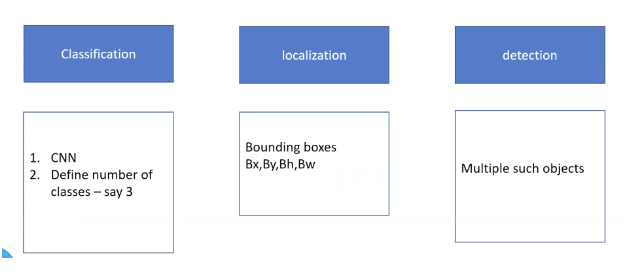

The base of object detection is still classification. The underlying technology is still CNN. But on top of that there r set of algorithms. One of latest techniques of object detection is **Yolo, You Only Look Once.**

*YOLO: Divides the image into a grid (e.g., 13x13 for YOLOv3). Each grid cell predicts a fixed number of bounding boxes and class probabilities. The predictions are based on the entire context of the image since all parts of the image are processed simultaneously.*

**Unified Architecture:** Traditional object detection systems often rely on two distinct steps:

Propose a bunch of bounding box regions in the image where objects might exist (region proposal).
Classify each proposed region into various object categories or background.
YOLO, on the other hand, takes a different approach. It divides the image into a grid, and each grid cell predicts bounding boxes and class probabilities simultaneously in one forward pass of the network. Thus, it "looks" at the image only once, rather than multiple times.

**Real-time Detection:** Because YOLO processes images in one pass, it's much faster than methods that require multiple passes for different stages. This allows for real-time object detection, making it suitable for applications where speed is crucial.

**End-to-End Learning:** Everything (bounding box predictions, class probabilities) is learned directly from the image data in a single network, which means the entire detection process can be trained end-to-end.

**Speed:** As mentioned earlier, YOLO is generally much faster. Systems like R-CNN or its successors (like Fast R-CNN and Faster R-CNN) often require more computation due to their multi-stage processing.

**Accuracy:** Initially, YOLO traded off some accuracy for its increased speed. However, with the advent of newer versions (like YOLOv2, YOLOv3, YOLOv4, etc.), the accuracy gap has been substantially reduced or even surpassed in some benchmarks when compared to other detectors.

**Generalization:** YOLO tends to be better at generalizing to objects in unusual poses or from atypical viewpoints. This is because, rather than focusing on fragmented or localized parts of an object (as sliding window or region proposal methods might), YOLO looks at the entire context of the image.

**Localization Error:** Earlier versions of YOLO tended to have more localization errors (e.g., bounding boxes not aligning perfectly with objects). This was due to each grid cell predicting only a limited number of boxes. However, subsequent versions improved on this.

**Complexity:** Traditional methods, especially the early ones, often combined various components and steps (like selective search for region proposal in R-CNN). YOLO simplifies the process with its unified approach.

*<font color=blue>Traditional methods often "look" at the image multiple times, primarily through a multi-stage process.*

R-CNN (Regions with CNN features):

1. Region Proposal: First, it uses a method called "Selective Search" to propose around 2000 region proposals where objects might exist. This is the first "look" at the image.

2. Feature Extraction: For each of these 2000 region proposals, a CNN is used to extract features. This is the second "look", and it's repeated for each proposed region.

3. Classification: Finally, these features are fed into SVMs (Support Vector Machines) to determine the class of each proposed region.

In these traditional methods, especially the early ones like R-CNN, the image or its features are processed multiple times for different stages, leading to increased computational cost. 

## Yolo and SSD

SSD (Single Shot MultiBox Detector) and YOLO (You Only Look Once) are not the same, but they share some similarities in their approach to object detection. Both are "single-shot" detectors, meaning they aim to detect objects in one forward pass of the network without the need for a separate region proposal step. This makes both methods relatively fast compared to two-stage detectors like R-CNN, Fast R-CNN, and Faster R-CNN.

## 3 Parts in Object Detection (but everything in 1 pass)

1. Classification
2. Localization
3. Detection

**1. Classification**

In object detection model when we do classification the softmax need to have predefined number of classes (that may be like a limitation of yolo but its like this now). Similar to CNN classification u create,train,test and then run model.

**2. Localization**

The boxes u see in the images that r bounding boxes. The concept of that is known as localization. Bounding boxes r defined by 4 parameters Bx, By which is center of box, Bh is height and Bw is width. If u know center, width, height u can draw the box. The drawing of box is itself some regular python code. Its a function u pass these 4 parameters which r predicted by the model & that function will create this box.

**3. Detection** If there are multiple instances of object, it will classify and localize those multiple instances.

Based on this, the output looks like below-

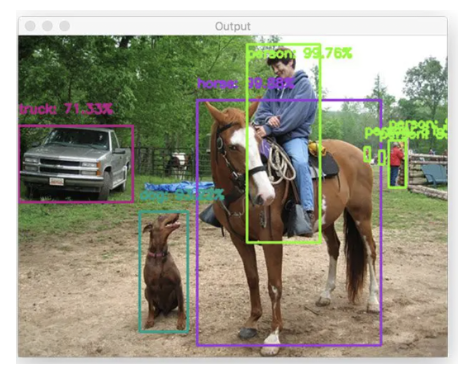

Yes, in YOLO (You Only Look Once), the percentage number associated with a detected object is indeed the final score, which is a combination of the confidence score and the class probability.

To clarify:

1. **Confidence Score**: For each bounding box predicted by YOLO, there is a confidence score associated with it. This score represents the likelihood that the bounding box contains an object (irrespective of the class). This is essentially the IoU (Intersection over Union) score between the predicted bounding box and any ground truth.

2. **Class Probabilities**: For each bounding box, YOLO also predicts a probability distribution over all the possible classes. This distribution represents the probabilities that the detected object in the bounding box belongs to each class.

3. **Final Score**: The final score for a specific class in a bounding box is calculated by multiplying the bounding box's confidence score with the class probability for that specific class. 

<font color=blue>During the post-processing phase, YOLO filters out bounding boxes based on this final score, using a threshold. Only the boxes with final scores above this threshold are retained. Furthermore, to avoid multiple boxes for the same object, a technique called Non-Maximum Suppression (NMS) is applied. It ensures that among overlapping boxes, only the one with the highest final score is kept.

So, when you see an output like "dog: 76.5%" in YOLO's detection result, it means that the final score (i.e., the confidence that there's an object in the bounding box multiplied by the probability that this object is a dog) is 76.5%.

<font color=blue> In the YOLO architecture, both the confidence scores for bounding boxes and the class probabilities are calculated simultaneously for every bounding box during the forward pass of the network. They are both part of the output of the YOLO model.

<font color=blue>However, during post-processing:

1. **<font color=blue>Thresholding on Confidence Score**: Bounding boxes with confidence scores below a certain threshold are typically discarded, as they are deemed unlikely to contain objects. This helps reduce the number of potential false positives.

2. **<font color=blue>Multiplying Confidence Score with Class Probabilities**: For the bounding boxes that remain after thresholding, the confidence scores are multiplied with the class probabilities to obtain the final scores for each class for each bounding box.

3. **<font color=blue>Thresholding on Final Score**: There's often another threshold applied on these final scores. Bounding boxes that don't have any class with a final score above this second threshold might be discarded.

4. **<font color=blue>Non-Maximum Suppression**: Finally, to ensure that each object is detected only once, non-maximum suppression (NMS) is applied. This process sorts all the bounding boxes by their final scores and keeps the one with the highest score, while discarding any box that has a high overlap (IoU) with it.

To summarize: Every bounding box predicted by YOLO gets both a confidence score and class probabilities. However, during post-processing, only those boxes that pass certain criteria based on these scores are retained in the final output.

## Inference Process in object detection

Any object detection model just like any pre-trained classfication model will atleast have 100-200 classes then only it will be meaningful.

Whole image is broken into what is known as grids and so we have the grid cells. Here we see 3 by 3, but in general it is much more finer like 19 by 19. So inference happens grid cell wise. So here it will be 9 outputs for 9 grids.

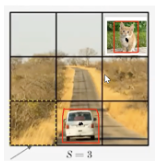

### Classification Output

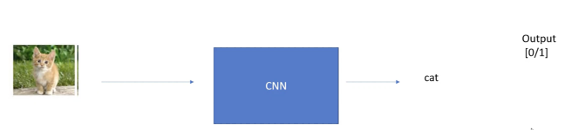

### Object Detection Output

In addition to Classification value it will also give the localization value.

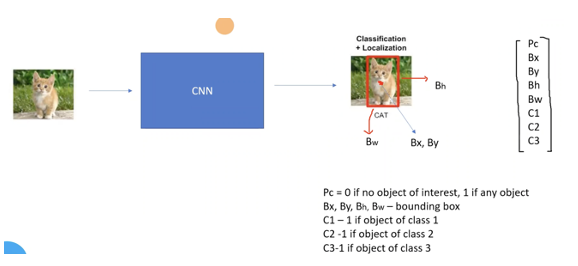

In YOLO, the terms you mentioned correspond to the following:

- \( p_c \): Confidence score, which indicates whether there's an object in the bounding box.
- \( b_x \): x-coordinate of the center of the bounding box.
- \( b_y \): y-coordinate of the center of the bounding box.
- \( b_w \): Width of the bounding box.
- \( b_h \): Height of the bounding box.
- \( c_1 \): Probability that the object in the bounding box belongs to class 1.
- \( c_2 \): Probability that the object in the bounding box belongs to class 2.

Now, addressing your question about the value of \( p_c \):

- **\( p_c \) is not strictly binary (i.e., it's not just 0 or 1). Instead, it's a continuous value between 0 and 1, representing the model's confidence that there is an object in the bounding box.** A value close to 1 means the model is highly confident there's an object in the box, while a value close to 0 means the model believes the box likely doesn't contain any object of interest.
  
- During training, the model learns to adjust this value to approximate the Intersection over Union (IoU) between the predicted bounding box and the ground truth. So, if a predicted bounding box matches very closely with the actual position of an object in the training data, \( p_c \) would be close to 1. If the predicted bounding box doesn't align well with any actual object, \( p_c \) would be close to 0.

- In practice, during post-processing, you'd set a threshold on \( p_c \), and bounding boxes with a confidence score below this threshold would be discarded.

So, in essence, while \( p_c \) is used to indicate the presence or absence of an object, it's a continuous value and not just binary.

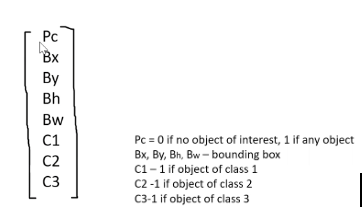

Output is an array, for each grid cell there is an array consisting of all the above values. In general it will be an array of 5 + number of classes, here there r 3 so an array of 8 for each grid.

Model only predicts Bx, By, Bh, Bw and then these values r passed to a function in python that will draw box. Model itself will not draw a box.

In YOLO, the class probabilities \( c_1, c_2, \ldots, c_n \) (for \( n \) classes) are not one-hot encoded. Instead, they represent the model's predicted probabilities that the object in the bounding box belongs to each of the classes.

The class probabilities are normalized such that they sum up to 1 across all classes. For example, if you have 2 classes:

- \( c_1 \) might represent the probability that the object in the bounding box is of class 1.
- \( c_2 \) represents the probability that the object is of class 2.

And:

\[
c_1 + c_2 = 1
\]

In the output, the class with the highest probability (after multiplying with the confidence score \( p_c \)) is typically taken as the predicted class for the bounding box.

One-hot encoding, on the other hand, is a binary representation used to indicate which class an instance belongs to, where one element is "hot" (i.e., set to 1) and all other elements are "cold" (i.e., set to 0). In YOLO's architecture, the output is a soft probability distribution across classes, rather than a hard one-hot encoded vector.

### Object vs Background Prediction

Unlike some image classification tasks where you might have a "background" or "none-of-the-above" class, typical object detection models don't have an explicit background class in their output. Instead, areas of the image that don't have a high confidence bounding box are implicitly treated as background.

### Yolo vs Semantic Segmentation

YOLO and semantic segmentation models have different purposes, architectures, and methodologies for processing images.

1. **YOLO's Approach**:
   - **Objective**: YOLO's primary objective is object detection. It aims to identify bounding boxes around objects and classify those objects.
   - **Processing**: YOLO divides the image into a grid (e.g., 13x13 for YOLOv3). Each grid cell predicts multiple bounding boxes and associated class probabilities.
   - **Pixel-level Classification**: While YOLO does process the entire image and every pixel contributes to the feature maps, it doesn't classify each pixel individually. Instead, it focuses on predicting bounding boxes and object classes.

2. **Semantic Segmentation's Approach**:
   - **Objective**: The goal of semantic segmentation is to classify each pixel in the image. It provides a dense classification where every pixel is labeled with a class.
   - **Processing**: Semantic segmentation models process the image and produce an output of the same width and height as the input image, where each output pixel corresponds to a class label.
   - **Pixel-level Classification**: Semantic segmentation models inherently classify every pixel in the image, differentiating between objects and possibly multiple background or scene classes.

In essence, while both YOLO and semantic segmentation models "look at" every pixel in terms of processing and extracting features, they handle the final classification differently. YOLO aims to detect objects by predicting bounding boxes and associated class labels, whereas semantic segmentation classifies each individual pixel.

## <font color=blue>How handle situations where multiple objects might be close together or overlap in context of grid?  ----> by multiple bounding box predictions for each grid cell

*<font color=blue>In YOLO, the idea behind allowing each grid cell to predict multiple bounding boxes is to account for situations where multiple objects might be close together or overlap in the context of the grid. By permitting each grid cell to predict multiple bounding boxes, YOLO can potentially detect multiple objects that occupy the same or nearby grid cells.*

Here's how it works:

1. **Anchor Boxes**: The concept of predicting multiple bounding boxes from a single grid cell is implemented using "anchor boxes." Anchor boxes are pre-defined bounding box shapes/sizes. In YOLO, each grid cell is responsible for predicting offsets and scales to these anchor boxes, rather than predicting bounding box coordinates from scratch.

2. **Predictions**: For each anchor box associated with a grid cell, the cell predicts:
   - Bounding box coordinates (\( b_x, b_y, b_w, b_h \))
   - Confidence score (\( p_c \)) indicating the likelihood that this bounding box contains an object
   - Class probabilities

3. **Overlapping Objects**: <font color=blue>Imagine a scenario where a large dog is behind a small cat, and both are centered around the same grid cell. If we had only one bounding box prediction per grid cell, we might only detect the larger dog. But by predicting multiple bounding boxes, each associated with different anchor box shapes/sizes, YOLO can potentially detect both the cat and the dog.

4. **Post-processing**: During post-processing, after the forward pass through the network, non-maximum suppression is applied to eliminate redundant boxes and retain only the most confident predictions. This step ensures that if a grid cell predicts multiple bounding boxes for the same object due to the multiple anchor boxes, only the most accurate one is retained.

In summary, by allowing each grid cell to predict multiple bounding boxes (using different anchor boxes as a base), YOLO improves its ability to detect multiple objects that might be close together, overlap, or have different sizes/shapes relative to the grid's scale.

## <font color=blue>How to decide on number of anchor boxes & hence bounding boxes for each grid cell?    ---> defined by user during model design based on characteristics of dataset characteristics

<font color=blue>The number of anchor boxes (and thereby the number of bounding box predictions) for each grid cell is a design choice and is defined by the user or the model's designer. When designing or training a YOLO model, one decides on the number of anchor boxes to use based on several factors:

1. **Dataset Characteristics**: If the dataset contains many overlapping objects or objects of varying shapes and sizes, using more anchor boxes might help capture this diversity.
 
2. **Trade-offs**: Increasing the number of anchor boxes can potentially improve detection accuracy for overlapping or differently sized objects. However, it also increases the computational cost and the size of the output tensor, as each anchor box results in predictions for bounding box coordinates, a confidence score, and class probabilities.

3. **Determination of Anchor Box Sizes**: The sizes and aspect ratios of the anchor boxes can be determined in various ways:
   - **Heuristics**: Based on knowledge of the dataset and the types of objects present.
   - **Clustering**: One common approach is to use clustering (e.g., k-means clustering) on the ground truth bounding boxes of the training dataset to determine typical sizes and aspect ratios. This method tries to find bounding box sizes that best represent the shapes of objects in the dataset.

4. **Popular Configurations**: 
   - **YOLOv2 (YOLO9000)**: Introduced the anchor box concept and used k-means clustering on the training set to determine five anchor boxes.
   - **YOLOv3**: Extended this to use three different scales, predicting three bounding boxes at each scale, resulting in a total of nine anchor boxes.

In practice, if you're training YOLO on a custom dataset, you might start with a commonly used number of anchor boxes (e.g., 5 or 9) and then adjust based on the performance you observe. If you're looking for optimal sizes and aspect ratios, you could run clustering on your training data's ground truth bounding boxes.

## Object Detection Benchmark Datasets

There are several benchmark datasets that have played a significant role in advancing the field of object detection. These datasets are commonly used to evaluate and compare the performance of different object detection algorithms. Here are some of the most popular ones:

1. **PASCAL VOC (Visual Object Classes)**
   - Years: 2007, 2012 are the most commonly used.
   - Contains: 20 object categories, including vehicles, animals, and everyday objects.
   - Tasks: Object detection, segmentation, and classification.
   
2. **MS COCO (Microsoft Common Objects in Context)**
   - Introduced in 2014 and updated annually.
   - Contains: 80 object categories.
   - Features complex scenes with multiple objects.
   - Tasks: Object detection, segmentation (instance and semantic), and keypoints detection for human pose estimation.
   
3. **ImageNet (Large Scale Visual Recognition Challenge - ILSVRC)**
   - Initially focused on image classification but later included an object detection challenge.
   - Contains: 200 object categories (for the detection task).
   - A very large dataset with millions of images.
   
4. **Open Images**
   - Introduced by Google.
   - A very large dataset with millions of images.
   - Contains: 600 object categories.
   - Tasks: Object detection, instance segmentation, and visual relationship detection.

5. **KITTI Vision Benchmark Suite**
   - Focuses on driving scenarios.
   - Contains: Multiple categories like cars, pedestrians, and cyclists.
   - Provides 2D and 3D object detection challenges, as well as other tasks related to autonomous driving like optical flow and tracking.

6. **Aerial Image Dataset (like DOTA, UCAS-AOD)**
   - Focuses on object detection from aerial or satellite images.
   - Contains: Various categories like ships, vehicles, airplanes, etc.

7. **WIDER FACE**
   - A face detection benchmark dataset.
   - Contains various face images under diverse challenges like different scales, occlusions, and poses.

8. **UA-DETRAC**
   - Focuses on vehicle detection and motion analysis.
   - Contains: Over 10,000 vehicle trajectories captured in various urban traffic scenes.

These are just a few of the benchmark datasets in object detection. The choice of dataset often depends on the specific domain or application of interest, e.g., general object detection, autonomous driving, aerial imaging, or face detection.

**Output Examples**

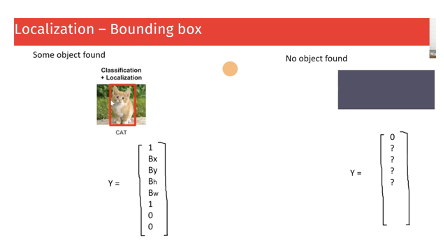

## Yolo - Inference

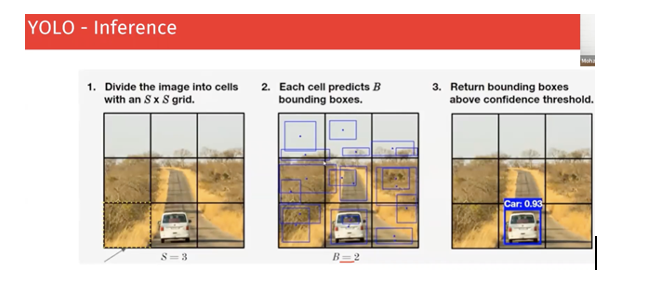

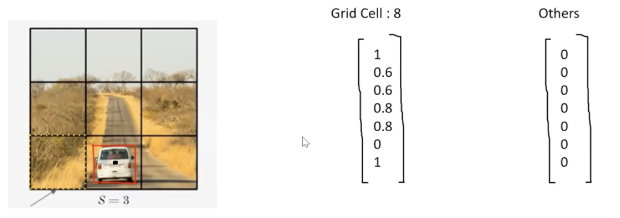

Grid 8 has object, rest all grids are 0 which are grid 1,2,3,4,5,6,7,9.

### Image in multiple cells

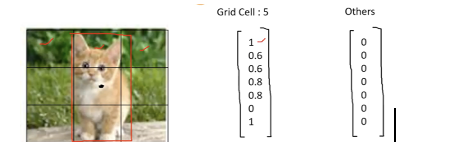

Whichever grid has center, gets the ownership of object. Here grid cell 5.

## Concept of tensors & how values r stored?

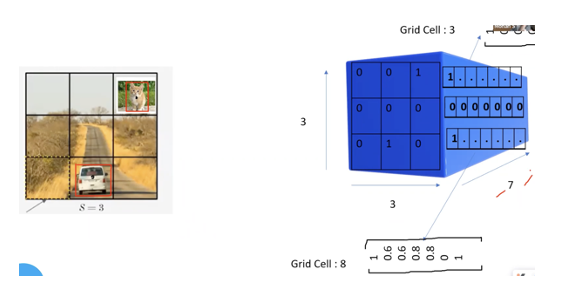

## Various Input forms for object detection-

1. Images
2. Video
3. Video through a webcam


### In object detection every object will be different size so how bounding box size selected ?



Selecting the size of bounding boxes in object detection is a critical aspect of the task, as it directly impacts the accuracy of detection and the ability to precisely localize objects. Here are some common approaches to determining bounding box size in object detection:

1. **Anchors or Prior Boxes**: Many object detection models, such as Faster R-CNN and SSD, use a predefined set of anchors or prior boxes of various sizes and aspect ratios. These anchors are positioned at different locations across the image and are used as references to predict bounding boxes. The model learns to adjust these anchors during training to fit objects of different sizes and shapes.

2. **Multi-Scale Detection**: Some object detection models operate at multiple scales. They use feature maps from different layers of the neural network to detect objects at different sizes. This approach allows the model to handle a wide range of object sizes within a single forward pass.

3. **Dynamic Bounding Box Sizes**: In some cases, bounding box sizes are determined dynamically based on the detected object's characteristics. For example, the size and aspect ratio of a bounding box might be adjusted based on the object's position, shape, and scale within the image.

4. **Regression and Scaling**: Object detection models often predict bounding box coordinates (e.g., center point, width, height) and class scores for each detected object. Post-processing techniques can be applied to refine the bounding box size based on these predictions. For example, you can apply non-maximum suppression (NMS) to remove redundant bounding boxes and keep the most confident ones.

5. **IoU Thresholds**: Intersection over Union (IoU) thresholds can be used to determine when to accept or reject a predicted bounding box. If the predicted box has a high IoU overlap with a ground truth object, it is considered a valid detection. This approach helps ensure that the bounding boxes closely align with the objects in the image.

6. **Scale-Invariant Models**: Some models are designed to be scale-invariant, which means they can detect objects at various scales without the need for predefined anchors or prior boxes. These models often use techniques like feature pyramid networks (FPN) to handle objects of different sizes.

The choice of bounding box size strategy depends on the specific object detection model and the requirements of the task. It's common for models to be trained on datasets where objects vary in size, allowing them to learn to adapt the bounding box sizes during training. Additionally, hyperparameters such as anchor scales and aspect ratios can be tuned to match the characteristics of the dataset and the objects of interest.